# CoinMarketCap: Exploratory Data Analysis



### Import and instantiate CoinMarketcap
This object represents the data found at https://coinmarketcap.com.

In [2]:
from Scrapers.Coinmarketcap import coinmarketcap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
cmk = coinmarketcap.CoinMarketcap()
coin_names = cmk.coin_names()
coin_names

['Bitcoin',
 'Ethereum',
 'Ripple',
 'Bitcoin Cash',
 'Litecoin',
 'Cardano',
 'NEO',
 'Stellar',
 'EOS',
 'Dash',
 'IOTA',
 'Monero',
 'NEM',
 'Ethereum Classic',
 'TRON',
 'VeChain',
 'Lisk',
 'Qtum',
 'Bitcoin Gold',
 'Tether',
 'OmiseGO',
 'ICON',
 'Zcash',
 'Verge',
 'Steem',
 'Bytecoin',
 'Binance Coin',
 'Nano',
 'Populous',
 'Stratis',
 'RChain',
 'Siacoin',
 'Waves',
 'Dogecoin',
 'Status',
 'DigixDAO',
 'Maker',
 'BitShares',
 'Aeternity',
 'Waltonchain',
 'Veritaseum',
 'Augur',
 'ZClassic',
 'Komodo',
 'Decred',
 'Revain',
 '0x',
 'Hshare',
 'Electroneum',
 'Ardor',
 'Gas',
 'Ark',
 'KuCoin Shares',
 'Basic Attenti...',
 'Syscoin',
 'DigiByte',
 'Zilliqa',
 'Dragonchain',
 'Bytom',
 'Loopring',
 'aelf',
 'Cryptonex',
 'MonaCoin',
 'QASH',
 'PIVX',
 'Golem',
 'Nebulas',
 'Kyber Network',
 'Byteball Bytes',
 'Dentacoin',
 'Aion',
 'Bitcore',
 'IOStoken',
 'Ethos',
 'ReddCoin',
 'GXShares',
 'Polymath',
 'ZCoin',
 'Factom',
 'Power Ledger',
 'Dent',
 'FunFair',
 'ChainLink',
 

### Get coin obects.
Coins are ranked by marketcap. The first one is probably bitcoin from https://coinmarketcap.com/currencies/bitcoin.

In [17]:
coins = cmk.coins()
coin_data = [coin.json() for coin in coins]
coin_data = pd.DataFrame(coin_data)
coin_data.head()

,github_url,marketcap,name,price,symbol,timestamp,url,volume
0,https://github.com/bitcoin/,180510000000,Bitcoin,10687.200000,BTC,None,http://coinmarketcap.com/currencies/bitcoin/,6936190000
1,https://github.com/ethereum,85936400000,Ethereum,877.930000,ETH,None,http://coinmarketcap.com/currencies/ethereum/,1963980000
2,https://github.com/ripple,36932700000,Ripple,0.944697,XRP,None,http://coinmarketcap.com/currencies/ripple/,329530000
3,https://github.com/bitcoincashorg/,21124100000,Bitcoin Cash,1243.260000,BCH,None,http://coinmarketcap.com/currencies/bitcoin-cash/,375301000
4,https://github.com/litecoin-project/litecoin,12039200000,Litecoin,217.280000,LTC,None,http://coinmarketcap.com/currencies/litecoin/,761322000


### Plot a Barchart of Coins by Marketcap

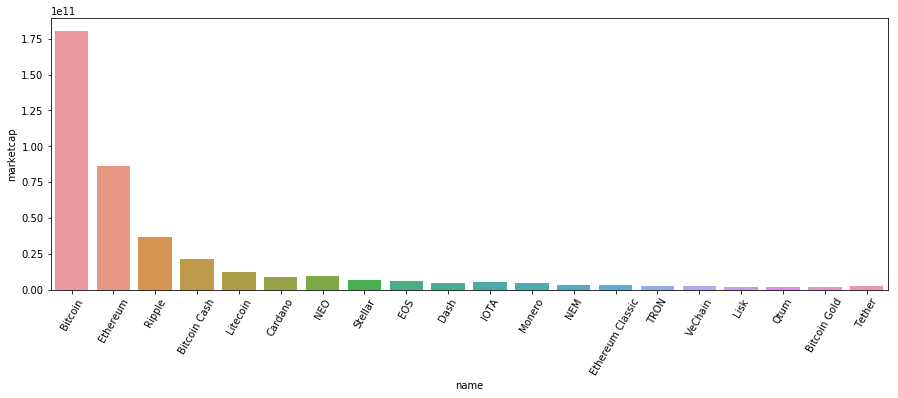

In [18]:
plt.figure(figsize=(15,5))
g = sns.barplot(data=coin_data[:20], x='name', y='marketcap')
g = g.set_xticklabels(labels=coin_data['name'], rotation=60)


### Plot a Pie Chart of Coins by Marketcap

In [19]:
# Aggregate smaller values into 'other' category
num_coins = 5
data = sorted(list(zip(coin_data['marketcap'].values, coin_data['name'].values)), reverse=True)
other = sum(d[0] for d in data[num_coins:])
data = data[:num_coins] + [(other, 'other')]
[sizes, labels] = zip(*data)

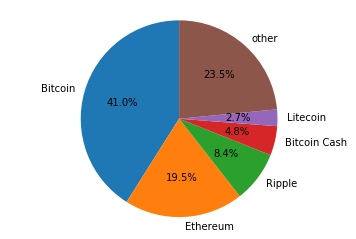

In [20]:
# Plot the chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Get GitHub Page for Bitcoin

In [21]:
bitcoin = coins[0]
btc_repo = bitcoin.repo()

### Plot GitHub Stars vs Marketcap

In [22]:
repos = [coin.repo() for coin in coins]

In [23]:
github_data = pd.DataFrame([r.json() for r in repos if r])

In [24]:
df = github_data.drop(['url'], 1).join(coin_data.set_index("name"), on="coin")

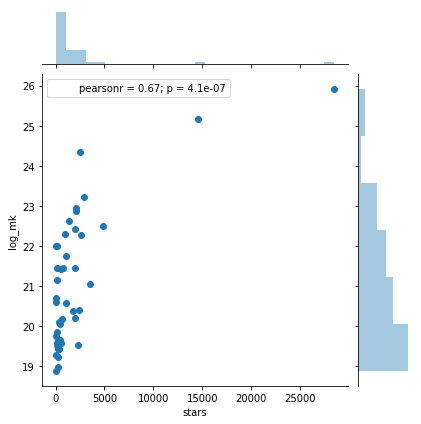

In [25]:
df['log_mk'] = np.log(df['marketcap'])
g = sns.jointplot(data=df, x='stars', y='log_mk')

### Get Bitcoin Price History

In [28]:
start, end = '20140101', '20180228'
bitcoin.get_history(start, end)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 28, 2018",10687.20,11089.80,10393.10,10397.90,6936190000,180510000000
1,"Feb 27, 2018",10393.90,10878.50,10246.10,10725.60,6966180000,175536000000
2,"Feb 26, 2018",9669.43,10475.00,9501.73,10366.70,7287690000,163283000000
3,"Feb 25, 2018",9796.42,9923.22,9407.06,9664.73,5706940000,165407000000
4,"Feb 24, 2018",10287.70,10597.20,9546.97,9813.07,6917930000,173682000000
5,"Feb 23, 2018",9937.07,10487.30,9734.56,10301.10,7739500000,167746000000
6,"Feb 22, 2018",10660.40,11039.10,9939.09,10005.00,8040080000,179936000000
7,"Feb 21, 2018",11372.20,11418.50,10479.10,10690.40,9405340000,191927000000
8,"Feb 20, 2018",11231.80,11958.50,11231.80,11403.70,9926540000,189536000000
9,"Feb 19, 2018",10552.60,11273.80,10513.20,11225.30,7652090000,178055000000


### Plot Bitcoin Market Cap

In [40]:
# date = datetime.datetime.strptime(d, "%b %d, %Y")
btc_history = bitcoin.read_history()
btc_history['dt'] = pd.to_datetime(btc_history['Date'])

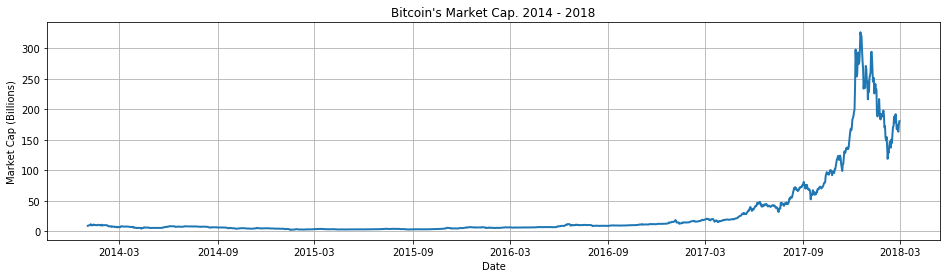

In [39]:
x = btc_history['dt']
y = btc_history['Market Cap'] / 1e9
plt.figure(figsize=(16,4))
plt.plot(x, y, linewidth=2)
plt.xlabel('Date')
#plt.xticks(np.arange(1900, 2020, 10.0))
plt.ylabel('Market Cap (Billions)')
plt.title("Bitcoin's Market Cap. 2014 - 2018")
plt.grid(True)